## EDA Grammys Dataset
By: María de los Ángeles Amú Moreno

#### The step #1 is to import the modules, make the connection to the database, and load the data into it.

In [1]:
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import json
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import os
import psycopg2

Next, we created the database credentials called "credentials_G.json", and contains the user, password, port, server & database name, to make the connection with the database

In [ ]:
with open('../credentials_G.json', 'r') as json_file:
    data = json.load(json_file)
    user = data["user"]
    password = data["password"]
    port= data["port"]
    server = data["server"]
    db = data["db"]

db_connection = f"postgresql+psycopg2://{user}:{password}@{server}:{port}/{db}"
engine=create_engine(db_connection)

The connection to the database was made correctly. To later create the table with the required columns.

In [3]:
Session = sessionmaker(bind=engine)
session = Session()

In [6]:
Base= declarative_base()

class grammys(Base):
    __tablename__ = 'grammys'
    id = Column(Integer, primary_key=True, autoincrement=True)
    year = Column(Integer)
    title = Column(String)
    published_at = Column(Date)
    updated_at = Column(Date)
    category = Column(String)
    nominee = Column(String)
    artist = Column(String)
    workers = Column(String)
    img = Column(String)
    winner = Column(Boolean)


engine = create_engine(db_connection)
Base.metadata.create_all(engine)

Next, we can see that the table was created successfully:
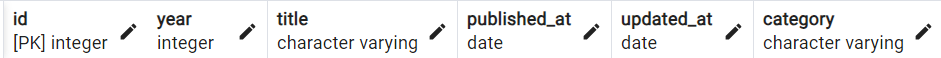
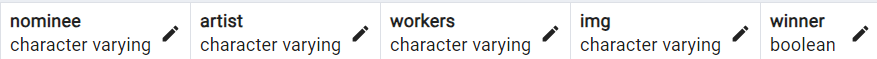


We upload the data in postgreSql:

In [10]:
class File:
    def __init__(self, file):
        self.df = pd.read_csv(file, sep=',', encoding='utf-8')

file_path = '../Data/the_grammy_awards.csv'
if os.path.exists(file_path):
    data = File(file_path)
    data.df.to_sql('grammys', engine, if_exists='replace', index=False)
    print("Data inserted")
else:
    print(f"File '{file_path}' not found.")


Data inserted


Here, let's fetch the "grammys" table from postgreSQL to do the EDA.

In [4]:
engine = create_engine(db_connection) 
connection = engine.connect()
table_name = 'grammys'  
df = pd.read_sql_table(table_name, connection) 
grammys=df

We make a ".head" to have a preview of the table we will work with:

In [5]:
grammys.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [5]:
grammys.shape

(4810, 10)

In the following chart, we will count the types of data we have in our dataset:

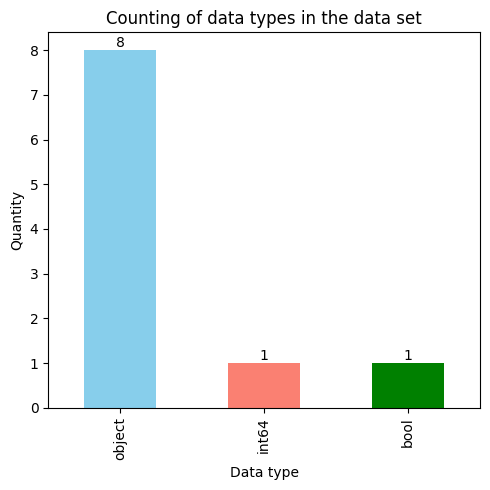

In [17]:
data_types_counts = grammys.dtypes.value_counts()

colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')

for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
grammys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In the following chart, we can see in detail which columns contain null values:

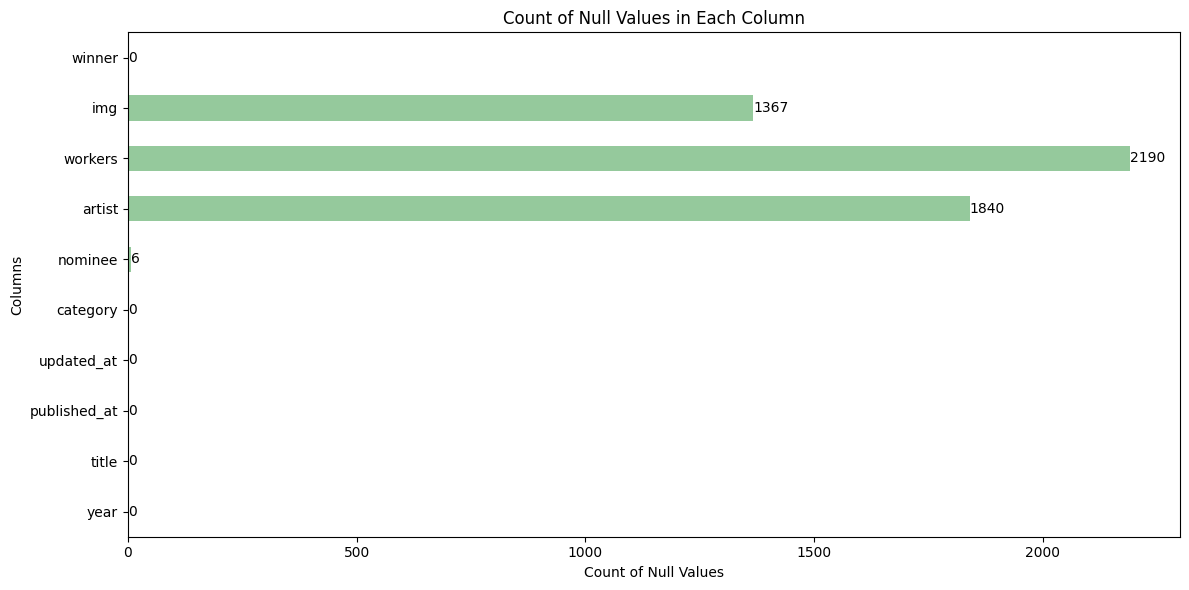

In [6]:
null_counts = grammys.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='barh', color='#95c99c')

plt.title('Count of Null Values in Each Column')
plt.xlabel('Count of Null Values')
plt.ylabel('Columns')

for i, value in enumerate(null_counts):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

As we can see, the columns "img", "workers", "artist" and "nominee" have null values in the dataset.
Being "workers" the column with more null data (2190), followed by "artist" with 1840, "img" with 1367 and finally "nominee" with 6, which last result is important because the transformation will not be so big.

Let us calculate the null values percentage of some of our candidates to be eliminated or transformated, taking into account our diagram.

In [14]:
null_percentageI = (grammys['img'].isnull().sum() / len(grammys)) * 100
print(f"The percentage of null values in the 'img' column is: {null_percentageI:.2f}%")

The percentage of null values in the 'img' column is: 28.42%


In [15]:
null_percentageW = (grammys['workers'].isnull().sum() / len(grammys)) * 100
print(f"The percentage of null values in the 'workers' column is: {null_percentageW:.2f}%")

The percentage of null values in the 'workers' column is: 45.53%


In [16]:
null_percentageA = (grammys['artist'].isnull().sum() / len(grammys)) * 100
print(f"The percentage of null values in the 'artist' column is: {null_percentageA:.2f}%")

The percentage of null values in the 'artist' column is: 38.25%


Number of Unique values per columns:

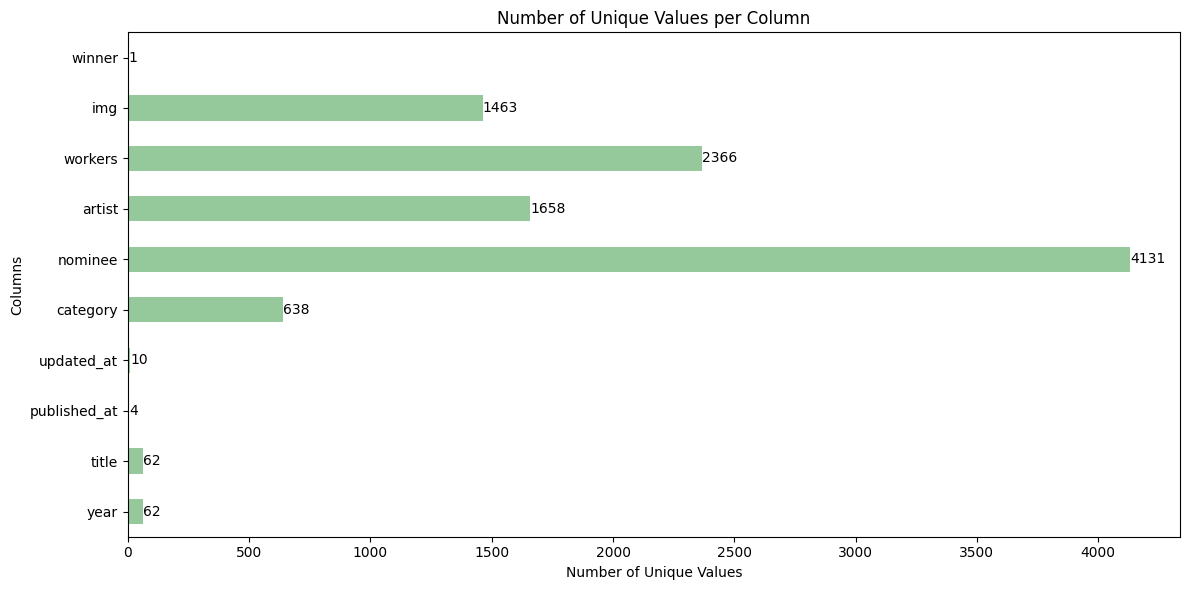

In [63]:
unique_counts = grammys.nunique()


colors = ['#95c99c']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

Looking at our diagram, we can see that there are values that are repeated in all columns.

##### Now, let's analyze some key columns to see what data we are working with and make decisions.

In [6]:
grammys.head(2)

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True


##### Year Range:

In [7]:
min_year = grammys['year'].min()
max_year= grammys['year'].max()
print(f"Our years range from {min_year} to {max_year}")

Our years range from 1958 to 2019


##### Grammys Title Analysis:

In [8]:
unique_titles = grammys['title'].unique()
unique_titles

array(['62nd Annual GRAMMY Awards  (2019)',
       '61st Annual GRAMMY Awards  (2018)',
       '58th Annual GRAMMY Awards  (2015)',
       '41st Annual GRAMMY Awards  (1998)',
       '57th Annual GRAMMY Awards  (2014)',
       '60th Annual GRAMMY Awards  (2017)',
       '55th Annual GRAMMY Awards  (2012)',
       '50th Annual GRAMMY Awards  (2007)',
       '53rd Annual GRAMMY Awards  (2010)',
       '59th Annual GRAMMY Awards  (2016)',
       '49th Annual GRAMMY Awards  (2006)',
       '48th Annual GRAMMY Awards  (2005)',
       '37th Annual GRAMMY Awards  (1994)',
       '56th Annual GRAMMY Awards  (2013)',
       '31st Annual GRAMMY Awards  (1988)',
       '54th Annual GRAMMY Awards  (2011)',
       '28th Annual GRAMMY Awards  (1985)',
       '52nd Annual GRAMMY Awards  (2009)',
       '51st Annual GRAMMY Awards  (2008)',
       '47th Annual GRAMMY Awards  (2004)',
       '26th Annual GRAMMY Awards  (1983)',
       '25th Annual GRAMMY Awards  (1982)',
       '20th Annual GRAMMY Award

WIth the following,we can check that they are somewhat disordered and following the sequence, I cannot see the 3 title with year; for that case I took as an example "3rd Annual GRAMMY Awards(1960)" wich evaluating the logic of the results, was held in 1960.

In [6]:
unique_value = grammys.loc[grammys['title'] == '3rd Annual GRAMMY Awards  (1960)', 'title']
print(unique_value)

4178    3rd Annual GRAMMY Awards  (1960)
4674    3rd Annual GRAMMY Awards  (1960)
4710    3rd Annual GRAMMY Awards  (1960)
4711    3rd Annual GRAMMY Awards  (1960)
4712    3rd Annual GRAMMY Awards  (1960)
4713    3rd Annual GRAMMY Awards  (1960)
4714    3rd Annual GRAMMY Awards  (1960)
4715    3rd Annual GRAMMY Awards  (1960)
4716    3rd Annual GRAMMY Awards  (1960)
4717    3rd Annual GRAMMY Awards  (1960)
4718    3rd Annual GRAMMY Awards  (1960)
4719    3rd Annual GRAMMY Awards  (1960)
4720    3rd Annual GRAMMY Awards  (1960)
4721    3rd Annual GRAMMY Awards  (1960)
4722    3rd Annual GRAMMY Awards  (1960)
4723    3rd Annual GRAMMY Awards  (1960)
4724    3rd Annual GRAMMY Awards  (1960)
4725    3rd Annual GRAMMY Awards  (1960)
4726    3rd Annual GRAMMY Awards  (1960)
4727    3rd Annual GRAMMY Awards  (1960)
4728    3rd Annual GRAMMY Awards  (1960)
4729    3rd Annual GRAMMY Awards  (1960)
4730    3rd Annual GRAMMY Awards  (1960)
4731    3rd Annual GRAMMY Awards  (1960)
4732    3rd Annu

With these results, we can see which titles we have with their respective date; in addition, we can see that we have repeated titles, as we could see in our "unique values per column" chart. The advantage is that we have no null values.

Taking into account the analysis of the columns "year" and "title", I wanted to make this diagram to know which are the 10 titles with the most nominees:

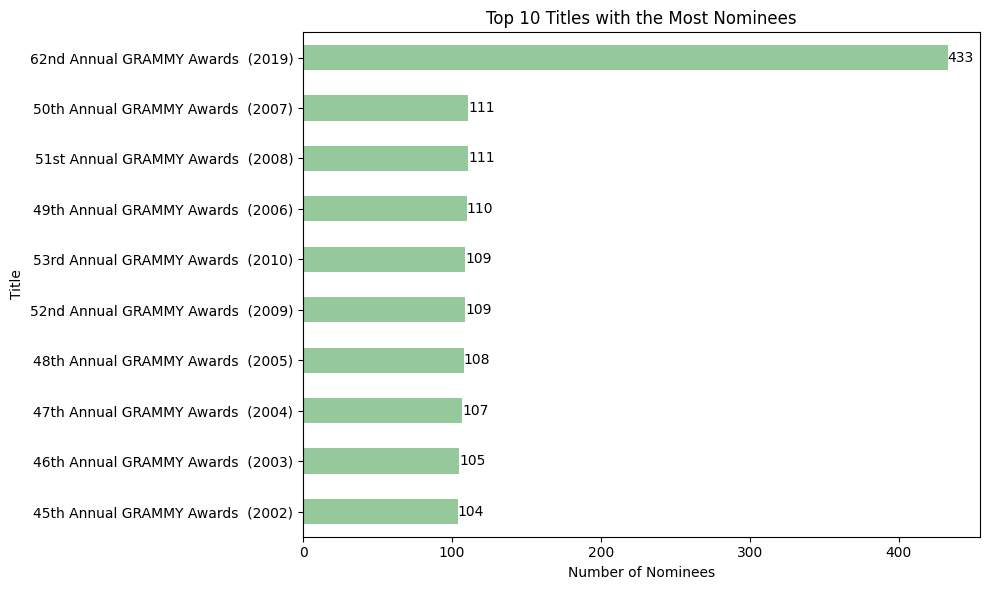

In [9]:
nominees_per_title = grammys['title'].value_counts()
top_10_titles = nominees_per_title.head(10)


plt.figure(figsize=(10, 6))
bars = top_10_titles.sort_values(ascending=True).plot(kind='barh', color='#95c99c')


for i, v in enumerate(top_10_titles.sort_values(ascending=True)):
    plt.text(v, i, str(v), ha='left', va='center', color='black')

plt.xlabel('Number of Nominees')
plt.ylabel('Title')
plt.title('Top 10 Titles with the Most Nominees')
plt.tight_layout()
plt.show()

Looking at our results, we can see that 2019 is the year with the highest number of nominees. This could have been due to the fact that by that time more talented singers came to light, released good songs and were nominated for this type of awards.

##### Checking "published_at" and "updated_at" (MIN and MAX dates):

In [85]:
min_publised = df['published_at'].min()
max_published= df['published_at'].max()

print(f"The minimum published date in our records is {min_publised} and the maximum is {max_published}")

The minimum published date in our records is 2017-11-28T00:03:45-08:00 and the maximum is 2020-05-19T05:10:28-07:00


In [91]:
print(grammys["published_at"].unique())

['2020-05-19T05:10:28-07:00' '2018-12-06T23:48:49-08:00'
 '2017-11-28T00:03:45-08:00' '2018-05-22T03:08:24-07:00']


In [87]:
min_updated = df['updated_at'].min()
max_updated= df['updated_at'].max()

print(f"The minimun updated date in our records is {min_updated} and the maximum is {max_updated}")

The minimun updated date in our records is 2017-11-28T00:03:45-08:00 and the maximum is 2020-09-01T12:16:40-07:00


In [92]:
print(grammys["updated_at"].unique())

['2020-05-19T05:10:28-07:00' '2019-09-10T01:06:11-07:00'
 '2019-09-10T01:09:02-07:00' '2019-09-10T01:08:19-07:00'
 '2020-09-01T12:16:40-07:00' '2019-09-10T01:06:59-07:00'
 '2019-09-10T01:11:09-07:00' '2017-11-28T00:03:45-08:00'
 '2019-09-10T01:07:37-07:00' '2019-09-10T01:11:48-07:00']


with these results, we can see that the minimum dates for "published" and "updated" are the same, and they change in their maximum dates, being "updated" the one with the most recent maximum date. And, as you can see there are only 4 unique values for published_at and 10 for updated_at for the whole dataset. I think that I don't going to use this columns, so later on will be deleted from the table.

##### "Category" Column Analysis

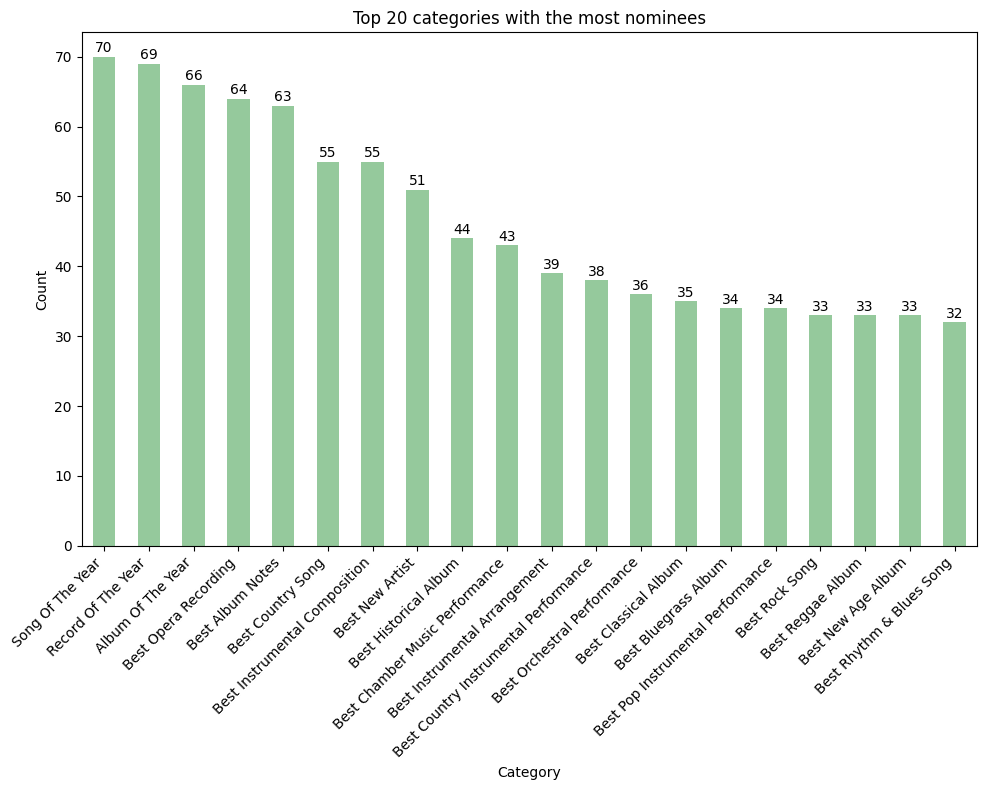

In [46]:
unique_categories = grammys['category'].value_counts().head(20)

plt.figure(figsize=(10, 8))
unique_categories.plot(kind='bar', color='#95c99c') 
plt.title('Top 20 categories with the most nominees')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(unique_categories):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.show()


In this analysis, we observed some of the categories for which the artists are nominated, noting that the "Song Of The Year" category has the highest number of values. Additionally, it is advantageous to note that the "Category" column has no null values, indicating the absence of missing data in that column. This suggests that the dataset is fairly complete in terms of information regarding the nomination categories of the artists.

##### Now, let's see if we have duplicate rows about the nominees, so we can see what we can do.

In [89]:
duplicates = grammys[grammys.duplicated(subset=['title', 'nominee', 'category'], keep=False)]

print("Duplicated rows:")
print(duplicates)

Duplicated rows:
Empty DataFrame
Columns: [year, title, published_at, updated_at, category, nominee, artist, workers, img, winner]
Index: []


As we can see, we don't have duplicated rows. It's is something significant, because we do not need a transformation to do in this case.

##### "Winner" Column Analysis:

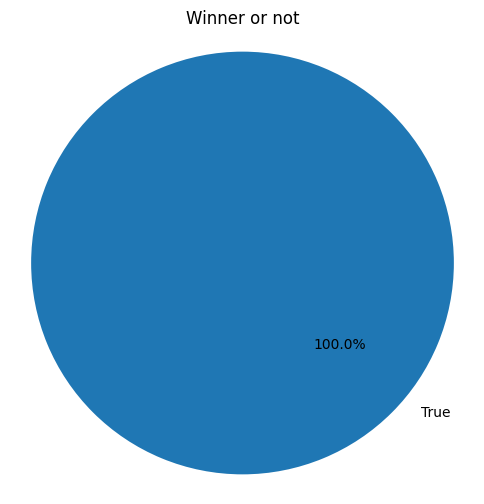

In [90]:
winner_counts = grammys['winner'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Winner or not')
plt.axis('equal')  
plt.show()

We have these results, and this is somewhat rare, because it isn't normal for all nominees to be winners.
One thing we can do is to consider all the "winners" not as winners, but as "nominees". Also we can conclude that this column is not really showing us if a singer-group was really a winner or not. The transformation we could do here is to change the column name to "nominated" or otherwise, eliminate it as it is not contributing as something meaningful in my analysis.

### Transformations

Taking into account our EDA, we can observe some transformations to do in our Dataset.


##### - Handle the Null values:
As we can see in our null value chart, we have 4 columns with null values, these are "img", "workers", "artist" and "nominee".

1. In the case of "img" I think that it isn't a column to be used in our analysis, so I will goint to drop it.
Also with the "published_at" and "updated_at" columns, as I had mentioned in the EDA, since in the end I will not use them in my analysis and looking at the unique values, one counts with 10, and the other with 4, something really not meaningful to use.

In [6]:
grammys = grammys.drop(['img', 'published_at', 'updated_at'], axis=1)
grammys.head()

,year,title,category,nominee,artist,workers,winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


Now, let's look at the null values we have in "artist" to see what we can do with them. One idea could be to put the first name of one of the workers and see how it works. We will filter only the rows where the column 'artist' is null (NaN) and the column 'workers' is not null.

In [7]:
filtered_df = grammys[(grammys['artist'].isnull()) & (~grammys['workers'].isnull())]

count = len(filtered_df)

selected_columns = filtered_df[['artist', 'workers']]
selected_columns_head = selected_columns.head(10)

pt= PrettyTable()

pt.field_names = ['Artist', 'Workers']

pt.align['Workers'] = 'l'

for index, row in selected_columns_head.iterrows():
    pt.add_row([row['artist'], row['workers']])


print(pt)

print(f"Amount of rows: {count}")

+--------+--------------------------------------------------------------------------------------------------+
| Artist | Workers                                                                                          |
+--------+--------------------------------------------------------------------------------------------------+
|  None  | Billie Eilish O'Connell & Finneas O'Connell, songwriters (Billie Eilish)                         |
|  None  | Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)                |
|  None  | Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)         |
|  None  | Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)    |
|  None  | Taylor Swift, songwriter (Taylor Swift)                                                          |
|  None  | Jack Antonoff & Lana Del Rey, songwriters (Lana Del Rey)                                         |
|  None  |

We had a surprise, and that is that the "workers" column contains the name of the artist in parentheses, so we will take that value out of the parentheses to fill in the null values:

In [8]:
grammys.loc[grammys['artist'].isnull() & grammys['workers'].str.contains(r'\(.*\)')][:5]

,year,title,category,nominee,artist,workers,winner
16,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,None,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,None,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",True
18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,None,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True
19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,None,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",True
20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",True


2. Here, we were able to rectify our approach well, and see which ID's correspond to them to make the transformation, to extract the artist information in parenthesis and fill the nulls in the column 'artist':
we will use the function "re" which stands for regular expressions; totally useful for this transformation. Now, let's make our transformation:

In [9]:
import re 

RE = grammys['artist'].isnull() & grammys['workers'].str.contains(r'\(.*\)')
grammys.loc[RE, 'artist'] = grammys.loc[RE, 'workers'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if isinstance(x, str) and re.search(r'\((.*?)\)', x) else None)

As we could see what number of rows those were, we will use the "iloc" function to select the rows from position 16 to position 20 which were some of the rows we filled.

In [10]:
grammys.iloc[16:21]

,year,title,category,nominee,artist,workers,winner
16,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",True
18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True
19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",True
20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",True


Now, let's see how many nulls we have:

In [11]:
grammys.isna().sum()    

year           0
title          0
category       0
nominee        6
artist       474
workers     2190
winner         0
dtype: int64

We can see that we have fewer null values in our "artist" column; let's continue exploring to see what else we can do...

For this, let's select the first 10 rows of the grammys_new DataFrame where the 'workers' column does not contain parentheses and the 'artist' column is empty.

In [12]:
grammys.loc[~grammys['workers'].str.contains(r'\(.*\)', na= False) & grammys['artist'].isnull()][7:13]

,year,title,category,nominee,artist,workers,winner
31,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yola,None,None,True
115,2018,61st Annual GRAMMY Awards (2018),Best New Artist,Dua Lipa,None,None,True
163,2015,58th Annual GRAMMY Awards (2015),Best Contemporary Classical Composition,Paulus: Prayers & Remembrances,None,"Stephen Paulus, composer",True
164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,None,"Randy Brecker, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,None,"Melissa Aldana, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Tomorrow Is The Question,None,"Julian Lage, soloist",True


Let me point out two observations I've made. Firstly, in rows where both the 'artist' and 'workers' columns are null, the artist's name is often found in the 'nominee' column. Therefore, we could potentially fill in some of the null values in 'artist' with the information from 'nominee'. On the other hand, in the 'workers' column, when there are no parentheses, it typically contains the names of the artists (when there are multiple artists) separated by semicolons and their titles separated by commas (e.g., composer or soloist). Hence, the suggestion would be to extract the first name listed and consider them as the "main" artist.

Let's see which rows comply with what I mentioned above:

In [15]:
grammys.loc[ grammys['workers'].str.contains('[;,]', na=False) & ~grammys['workers'].str.contains(r'\(.*\)', na=False) & grammys['artist'].isnull()][:5]

,year,title,category,nominee,artist,workers,winner
163,2015,58th Annual GRAMMY Awards (2015),Best Contemporary Classical Composition,Paulus: Prayers & Remembrances,None,"Stephen Paulus, composer",True
164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,None,"Randy Brecker, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,None,"Melissa Aldana, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Tomorrow Is The Question,None,"Julian Lage, soloist",True
167,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,The Windup,None,"Branford Marsalis, soloist",True


3. We populate the 'artist' field with details from the 'workers' column, extracting the first name before a ';' or a ',', under the assumption that this name consistently represents the primary artist.

In [16]:
workerCondition= grammys['workers'].str.contains('[;,]', na=False) & ~grammys['workers'].str.contains(r'\(.*\)', na=False) & grammys['artist'].isnull()

grammys.loc[workerCondition, 'artist'] = grammys.loc[workerCondition, 'workers'].str.split('[;,]').str[0].str.strip()

In [17]:
grammys.iloc[163:166]

,year,title,category,nominee,artist,workers,winner
163,2015,58th Annual GRAMMY Awards (2015),Best Contemporary Classical Composition,Paulus: Prayers & Remembrances,Stephen Paulus,"Stephen Paulus, composer",True
164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,Randy Brecker,"Randy Brecker, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,Melissa Aldana,"Melissa Aldana, soloist",True


Let us now review how many null values we have:

In [18]:
grammys.isna().sum()

year           0
title          0
category       0
nominee        6
artist       197
workers     2190
winner         0
dtype: int64

We can see that we have 197 null values in "artist", something really positive.
Now, something that I noticed was that the columns "workers" and "artist" have null values both as we will see below:

In [19]:
grammys.loc[grammys['artist'].isnull()][5:15]

,year,title,category,nominee,artist,workers,winner
29,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,ROSALÍA,None,None,True
30,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Tank And The Bangas,None,None,True
31,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yola,None,None,True
115,2018,61st Annual GRAMMY Awards (2018),Best New Artist,Dua Lipa,None,None,True
192,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,See The Light,None,Travis Greene Featuring Jekalyn Carr,True
193,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,Speak The Name,None,Koryn Hawthorne Featuring Natalie Grant,True
198,2019,62nd Annual GRAMMY Awards (2019),Best Contemporary Christian Music Performance/...,God's Not Done With You (Single Version),None,Tauren Wells,True
402,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Shaw: Orange,None,Attacca Quartet,True
403,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,None,Christopher Rountree & Wild Up,True
404,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Freedom & Faith,None,PUBLIQuartet,True


Woooow, if we look at the "nominee" column, we can see that the name of the artist appears; in addition, in "workers" there are some names, which we can move to the "artist" column; assuming that they are the artists. For example, we can see the name "Tauren Wells", who is an American singer. So let's go to it.

4. First, we will pass the names that appear in "workers" to artist:

In [20]:
workers = grammys['artist'].isnull() & ~grammys['workers'].isnull()

grammys.loc[workers, 'artist'] = grammys.loc[workers, 'workers']

Now, we will filter these results:

In [21]:
workersNameList = [192, 193, 198, 402, 403]

grammys.iloc[workersNameList]

,year,title,category,nominee,artist,workers,winner
192,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,See The Light,Travis Greene Featuring Jekalyn Carr,Travis Greene Featuring Jekalyn Carr,True
193,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,Speak The Name,Koryn Hawthorne Featuring Natalie Grant,Koryn Hawthorne Featuring Natalie Grant,True
198,2019,62nd Annual GRAMMY Awards (2019),Best Contemporary Christian Music Performance/...,God's Not Done With You (Single Version),Tauren Wells,Tauren Wells,True
402,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Shaw: Orange,Attacca Quartet,Attacca Quartet,True
403,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,Christopher Rountree & Wild Up,Christopher Rountree & Wild Up,True


Perfect, now let's look at the other thing I mentioned, which is that we had (None) in the columns "artist" and "workers".

In [22]:
grammys.loc[grammys['artist'].isnull()][:5]

,year,title,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,None,None,True
25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,None,None,True
26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,None,None,True
27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,None,None,True
28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Maggie Rogers,None,None,True


5. Let's do it:

In [23]:
grammys.loc[(grammys['artist'].isnull()), 'artist'] = grammys['nominee']

In [24]:
list = [24,25,26,27,28]

grammys.iloc[list]

,year,title,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,Billie Eilish,None,True
25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,Black Pumas,None,True
26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,Lil Nas X,None,True
27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,Lizzo,None,True
28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Maggie Rogers,Maggie Rogers,None,True


Perfect, we did it. Now let's see how many null values we have:

In [25]:
grammys.isna().sum()

year           0
title          0
category       0
nominee        6
artist         6
workers     2190
winner         0
dtype: int64

It is satisfying to see that in "artist" we only have 6 null values, let's print those values and see what else we can do to the column:

In [26]:
grammys.loc[grammys['artist'].isnull()][:7]

,year,title,category,nominee,artist,workers,winner
2274,2000,43rd Annual GRAMMY Awards (2000),"Remixer of the Year, Non-Classical",None,None,None,True
2372,1999,42nd Annual GRAMMY Awards (1999),"Remixer Of The Year, Non-Classical",None,None,None,True
2464,1998,41st Annual GRAMMY Awards (1998),"Remixer Of The Year, Non-classical",None,None,None,True
2560,1997,40th Annual GRAMMY Awards (1997),"Remixer Of The Year, Non-Classical",None,None,None,True
4527,1965,8th Annual GRAMMY Awards (1965),Best New Country & Western Artist,None,None,None,True
4574,1964,7th Annual GRAMMY Awards (1964),Best New Country & Western Artist Of 1964,None,None,None,True


Here we print those values, but we see that we cannot do anything else, so I have decided to delete the rows of "artist" that contain those null values.
I will also remove the null values from the "nominee" column since there are only 6 records as in "artist".

Another thing I noticed here was that in the "category" column there are values with capital letters and others with small letters, but we will organize that later.For example, we find "Remixer of the Year, Non-Classical" and further down "Remixer Of The Year, Non-classical" and also written "Remixer Of The Year, Non-Classical". As these columns will be eliminated, I still prevent by doing the transformation for all values.

I have taken the decision to delete the "workers" column since it was only useful to perform my transformations; it will not be useful for my final analysis.

In [27]:
# 6. Delete the null values in "artist" and "nominee"
grammys.dropna(subset=['artist', 'nominee'], inplace=True)

#Delete the column "workers"
grammys.drop(['workers'], axis=1, inplace=True)

Now, let's see how many nulls we are left with:

In [28]:
grammys.isna().sum()

year        0
title       0
category    0
nominee     0
artist      0
winner      0
dtype: int64

7. How satisfying to see no null values among them. But something escapes me, as I mentioned before, let's do the respective procedure with the "category" column on the upper and lower case values. I will take the opportunity to leave all of them in lowercase and remove the characters between them.

In [29]:
grammys['category'] = [i.lower().replace('(', '').replace(')', '').replace('-', ' ').replace(',', '') for i in grammys['category']]

In [30]:
grammys['category'].unique()

array(['record of the year', 'album of the year', 'song of the year',
       'best new artist', 'best pop solo performance',
       'best pop duo/group performance',
       'best traditional pop vocal album', 'best pop vocal album',
       'best dance recording', 'best dance/electronic album',
       'best contemporary instrumental album', 'best rock performance',
       'best metal performance', 'best rock song', 'best rock album',
       'best alternative music album', 'best r&b performance',
       'best traditional r&b performance', 'best r&b song',
       'best urban contemporary album', 'best r&b album',
       'best rap performance', 'best rap/sung performance',
       'best rap song', 'best rap album', 'best country solo performance',
       'best country duo/group performance', 'best country song',
       'best country album', 'best new age album',
       'best contemporary classical composition',
       'best improvised jazz solo', 'best jazz vocal album',
       'best jazz i

8. Now, one last thing to do is to change the name of the column "winner" to synonym for "nominated".

In [31]:
grammys.rename(columns={'winner': 'nominated'}, inplace=True)

Now, let's see our final dataframe with the required transformations:

In [32]:
grammys.head(10)

,year,title,category,nominee,artist,nominated
0,2019,62nd Annual GRAMMY Awards (2019),record of the year,Bad Guy,Billie Eilish,True
1,2019,62nd Annual GRAMMY Awards (2019),record of the year,"Hey, Ma",Bon Iver,True
2,2019,62nd Annual GRAMMY Awards (2019),record of the year,7 rings,Ariana Grande,True
3,2019,62nd Annual GRAMMY Awards (2019),record of the year,Hard Place,H.E.R.,True
4,2019,62nd Annual GRAMMY Awards (2019),record of the year,Talk,Khalid,True
5,2019,62nd Annual GRAMMY Awards (2019),record of the year,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,True
6,2019,62nd Annual GRAMMY Awards (2019),record of the year,Truth Hurts,Lizzo,True
7,2019,62nd Annual GRAMMY Awards (2019),record of the year,Sunflower,Post Malone & Swae Lee,True
8,2019,62nd Annual GRAMMY Awards (2019),album of the year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,True
9,2019,62nd Annual GRAMMY Awards (2019),album of the year,"I,I",Bon Iver,True


Let's check if after doing the transformations, we have duplicate values:

In [33]:
grammys.loc[df.duplicated()]

,year,title,category,nominee,artist,nominated


Perfect, we do not have duplicate values. Something positive.